In [51]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cf


In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/FakeBills/main/dataset/fake_bills.csv", sep = ';')
print(df.shape)
df.head()

(1500, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [53]:
df.isnull().sum()


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Dropping all null rows

In [54]:
df.dropna(inplace=True)
df.reset_index(inplace = True)
print(df.shape[0])
df.isnull().sum()

1463


index           0
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

converting boolean values to 0 and 1

In [55]:
for i in range(0,1463):
  if df.loc[i,'is_genuine']:
    df.loc[i,'is_genuine']=1
  else:
    df.loc[i,'is_genuine']=0
df.head()

,index,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54


Creating the train and test data

In [60]:
X = df.drop(['is_genuine'],axis = 1)
y = df['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

Creating model

In [61]:
clf = knn(n_neighbors=5)
y_train = y_train.astype(bool)
clf.fit(X_train, y_train)

KNeighborsClassifier()

Checking accuracy R^2 value

In [62]:
clf.score(X_test,y_test)

1.0

Confusion matrix

Text(58.222222222222214, 0.5, 'Truth')

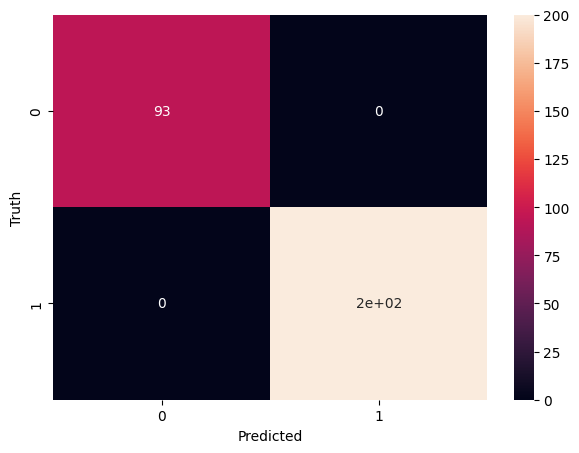

In [63]:
y_pred = clf.predict(X_test)
cm = cf(y_test,y_pred)
plt.figure(figsize = (7,5))
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")